# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [59]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data.apply(lambda x: sum(x.isnull().values), axis = 0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное 
2.   Равномерное 
3.   Биноминальное 
4.   Бернулли дискр 
5.   Геометрическое 
6.   Логнормальное 



In [57]:
data['CRIM'].nunique()

504

In [55]:
len(data.CRIM)

506

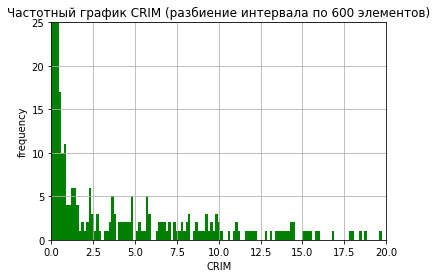

In [12]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(data['CRIM'],600, facecolor='g')

plt.xlabel('CRIM')
plt.ylabel('frequency')
plt.title('Частотный график CRIM (разбиение интервала по 600 элементов)')
plt.grid(True)
plt.xlim((0, 20))   
plt.ylim(0, 25)
plt.show()

Похоже на экспоненциальное

In [12]:
data['ZN'].nunique()

26

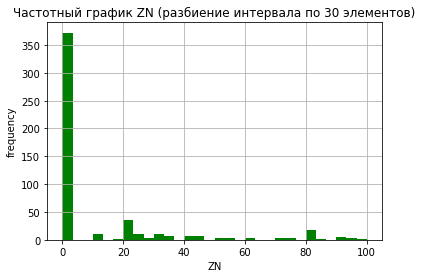

In [13]:
n, bins, patches = plt.hist(data['ZN'], 30, facecolor='g')

plt.xlabel('ZN')
plt.ylabel('frequency')
plt.title('Частотный график ZN (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

In [16]:
data['INDUS'].nunique()

76

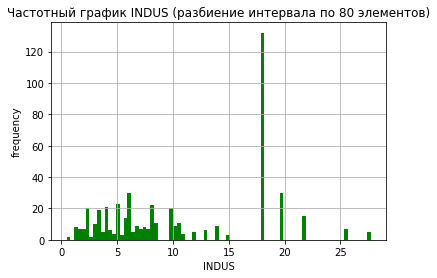

In [9]:
n, bins, patches = plt.hist(data['INDUS'], 80, facecolor='g')

plt.xlabel('INDUS')
plt.ylabel('frequency')
plt.title('Частотный график INDUS (разбиение интервала по 80 элементов)')
plt.grid(True)
plt.show()

In [25]:
data['CHAS'].nunique()

2

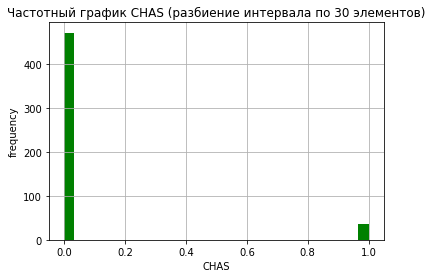

In [28]:
n, bins, patches = plt.hist(data['CHAS'], 30, facecolor='g')

plt.xlabel('CHAS')
plt.ylabel('frequency')
plt.title('Частотный график CHAS (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

Это распраделение Бернулли

In [6]:
data['NOX'].nunique()

81

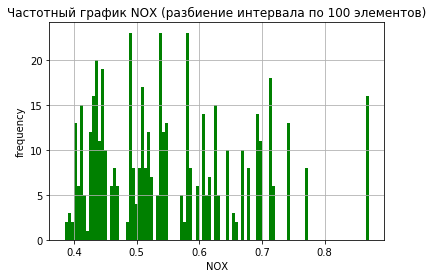

In [8]:
n, bins, patches = plt.hist(data['NOX'], 100, facecolor='g')

plt.xlabel('NOX')
plt.ylabel('frequency')
plt.title('Частотный график NOX (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [31]:
data['RM'].nunique()

446

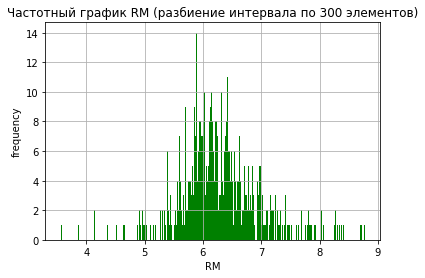

In [13]:
n, bins, patches = plt.hist(data['RM'], 300, facecolor='g')

plt.xlabel('RM')
plt.ylabel('frequency')
plt.title('Частотный график RM (разбиение интервала по 300 элементов)')
plt.grid(True)
plt.show()

Это нормальное распределение Гаусса

In [37]:
data['AGE'].nunique()

356

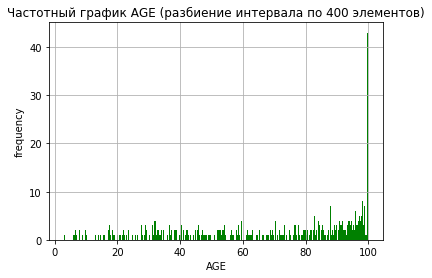

In [17]:
n, bins, patches = plt.hist(data['AGE'], 400, facecolor='g')

plt.xlabel('AGE')
plt.ylabel('frequency')
plt.title('Частотный график AGE (разбиение интервала по 400 элементов)')
plt.grid(True)
plt.show()

In [39]:
data['DIS'].nunique()

412

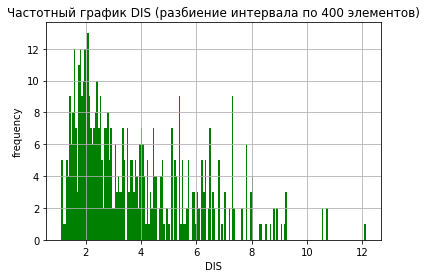

In [19]:
n, bins, patches = plt.hist(data['DIS'], 200, facecolor='g')

plt.xlabel('DIS')
plt.ylabel('frequency')
plt.title('Частотный график DIS (разбиение интервала по 400 элементов)')
plt.grid(True)
plt.show()

Это логнормальное распределение 

In [41]:
data['RAD'].nunique()

9

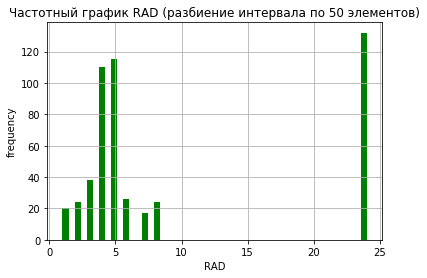

In [13]:
n, bins, patches = plt.hist(data['RAD'], 50, facecolor='g')

plt.xlabel('RAD')
plt.ylabel('frequency')
plt.title('Частотный график RAD (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [43]:
data['TAX'].nunique()

66

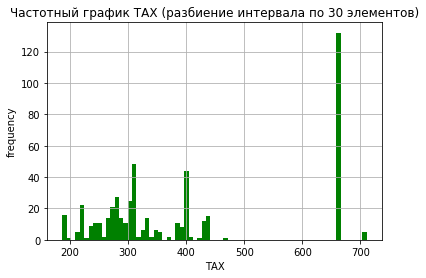

In [62]:
n, bins, patches = plt.hist(data['TAX'], 70, facecolor='g')

plt.xlabel('TAX')
plt.ylabel('frequency')
plt.title('Частотный график TAX (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

In [45]:
data['PTRATIO'].nunique()

46

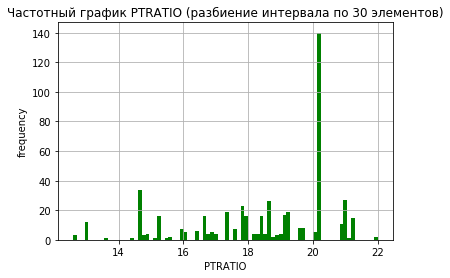

In [46]:
n, bins, patches = plt.hist(data['PTRATIO'], 80, facecolor='g')

plt.xlabel('PTRATIO')
plt.ylabel('frequency')
plt.title('Частотный график PTRATIO (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

In [47]:
data['B'].nunique()

357

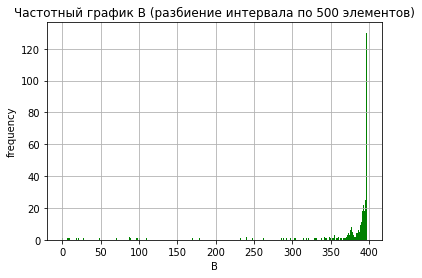

In [20]:
n, bins, patches = plt.hist(data['B'], 500, facecolor='g')

plt.xlabel('B')
plt.ylabel('frequency')
plt.title('Частотный график B (разбиение интервала по 500 элементов)')
plt.grid(True)
plt.show()

In [49]:
data['LSTAT'].nunique()

455

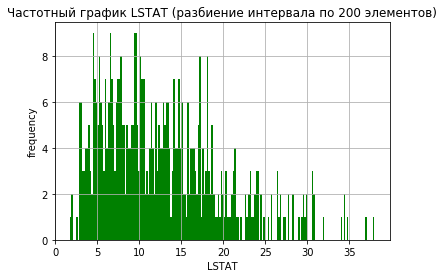

In [28]:
n, bins, patches = plt.hist(data['LSTAT'], 200, facecolor='g')

plt.xlabel('LSTAT')
plt.ylabel('frequency')
plt.title('Частотный график LSTAT (разбиение интервала по 200 элементов)')
plt.grid(True)
plt.show()

Тоже на логнормальное, вроде, похоже

In [51]:
data['MEDV'].nunique()

229

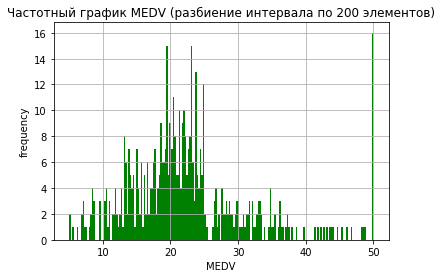

In [29]:
n, bins, patches = plt.hist(data['MEDV'], 200, facecolor='g')

plt.xlabel('MEDV')
plt.ylabel('frequency')
plt.title('Частотный график MEDV (разбиение интервала по 200 элементов)')
plt.grid(True)
plt.show()

Похоже на нормальное распределение..


Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

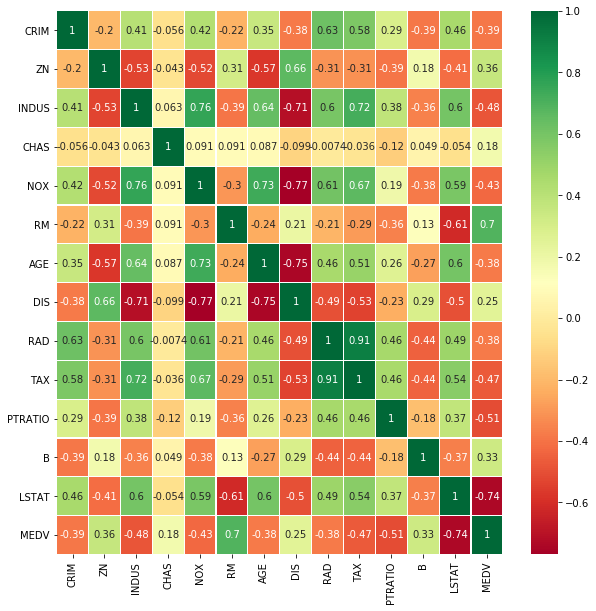

In [31]:

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(10,10)
plt.show()

LSTAT - это атрибут, максимально коррелирующий с ценой на дома (MEDV атрибут), при этом атрибуты имеют обратную взаимозависимость

In [33]:
# расчет коэффициента корреляции (и p-value) без визуализации
from scipy.stats import pearsonr
pearsonr(data['MEDV'], data['LSTAT'])

(-0.7376627261740146, 5.081103394387836e-88)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    lstat,
    medv,
    test_size = 0.2
)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print('Среднеквадратичная ошибка: ', mean_squared_error(predicted_y, y_test))
print('Абсолютная ошибка: ', mean_absolute_error(predicted_y, y_test))

Среднеквадратичная ошибка:  37.916824920666436
Абсолютная ошибка:  4.36921261478871


В идеале: ошибка модели должна стремится к нулю. У нас, вроде, неплохая модель.

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [58]:
# Посчитать матрицу ковариаций попарно. 
data1 = data.dropna()
data1.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2088.550668,1171.892806,1037.040699,1097.680164,1745.007194,1126.437205,437.435971,992.822302,1625.961768,1661.550154
SD of Ladder,1171.892806,2127.170144,184.695683,1298.799281,1268.032374,520.631655,498.416547,796.974460,1327.720144,1293.221942
Positive affect,1037.040699,184.695683,1965.293114,694.321274,880.136691,1392.962795,427.188489,826.971942,597.456937,661.012436
Negative affect,1097.680164,1298.799281,694.321274,1980.795272,1369.014388,835.041521,316.040288,697.807914,1091.695581,992.679651
Social support,1745.007194,1268.032374,880.136691,1369.014388,2099.086331,989.151079,290.978417,918.334532,1592.892086,1521.895683
Freedom,1126.437205,520.631655,1392.962795,835.041521,989.151079,2034.819322,784.235971,1005.233094,754.765057,841.068243
Corruption,437.435971,498.416547,427.188489,316.040288,290.978417,784.235971,1819.535252,536.400719,344.248921,279.475540
Generosity,992.822302,796.974460,826.971942,697.807914,918.334532,1005.233094,536.400719,2000.574460,891.584892,891.374460
Log of GDP\nper capita,1625.961768,1327.720144,597.456937,1091.695581,1592.892086,754.765057,344.248921,891.584892,1879.769579,1665.842035
Healthy life\nexpectancy,1661.550154,1293.221942,661.012436,992.679651,1521.895683,841.068243,279.475540,891.374460,1665.842035,1934.236948


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [45]:
data['null_count'] = data.apply(lambda x: sum(x.isnull().values), axis = 1)
data['null_count'].sum()

23

In [46]:
data.apply(lambda x: sum(x.isnull().values), axis = 0) # нет отсутствующих значений в выборке Country (region)?

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
null_count                  0
dtype: int64

Сколько стран в выборке? Написать ответ. 

In [42]:
data['Country (region)'].nunique()

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

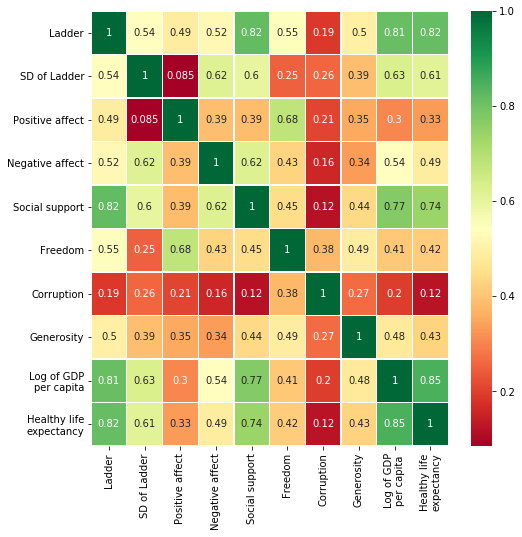

In [55]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(8,8)
plt.show()

Наблюдается сильная корреляция Healthy life expectancy и Log of GDP\nper capita, а также Ladder с Log of GDP\nper capita и Healthy life expectancy

In [3]:
# еще можно так построить
np.round_(data.corr(), decimals=2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP\nper capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life\nexpectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


In [4]:
# или еще вот так можно
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP per capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life expectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

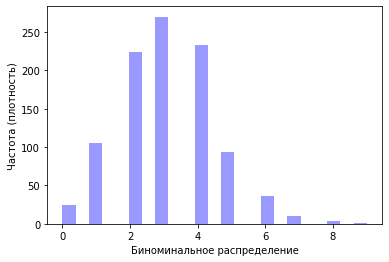

In [16]:
data_binom = stats.binom.rvs(n=10,p=0.3, size=1000)

ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue')
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

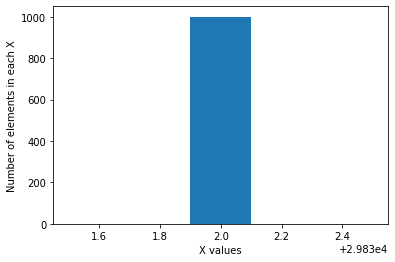

In [17]:
data_binom = stats.binom.rvs(n=100, p=0.3, size=1000)

number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    X1[i] = np.sum(np.array(data_binom))/ len(data_binom)
plt.hist(X1, 5)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()


Полагаю, что должно получиться распределение, стремящееся к нормальному, а не грустный одинокий столбик, да? 
Но тут я зашла в тупик.